In [28]:
import os

import pickle
import pandas as pd
from tabulate import tabulate

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Build dataframe from records
dir_ = "../tmp_cache/"

data = []
for file_ in os.listdir(dir_):
    with open(f"{dir_}/{file_}", "rb") as fh:
        data_ = pickle.load(fh)
        data.append(data_)

df = pd.DataFrame.from_records(data)
df.to_csv("tmp_df.csv")

In [30]:
# Remove extraneous data
df = df.query("distance != 'logistic'")
df = df.drop(["N", "prob", "rep", "largest_component", "dimensions", "walk_length", "num_walks", "workers", "window", "min_count", "batch_words", "kmax", "_time_embedd", "_time_all"], axis="columns")
print(
    tabulate(df.head(), headers="keys", tablefmt="fancy_grid")
)

╒════╤════════╤════════╤═════════╤═════════════════╤══════╤═══════╤════════════╤══════════╤════════════╕
│    │   tau1 │   tau2 │   avg_k │   min_community │   mu │   pfi │ distance   │    AUROC │   Accuracy │
╞════╪════════╪════════╪═════════╪═════════════════╪══════╪═══════╪════════════╪══════════╪════════════╡
│  2 │    2.5 │      1 │      12 │             100 │ 0.75 │   0.5 │ inverse    │ 0.852966 │   0.540897 │
├────┼────────┼────────┼─────────┼─────────────────┼──────┼───────┼────────────┼──────────┼────────────┤
│  6 │    2.1 │      1 │       5 │              10 │ 0.3  │   0.8 │ negexp     │ 0.836798 │   0.746951 │
├────┼────────┼────────┼─────────┼─────────────────┼──────┼───────┼────────────┼──────────┼────────────┤
│  7 │    2.9 │      1 │       5 │              10 │ 0.3  │   0   │ inverse    │ 0.479614 │   0.517438 │
├────┼────────┼────────┼─────────┼─────────────────┼──────┼───────┼────────────┼──────────┼────────────┤
│ 10 │    2.1 │      1 │       5 │              10 │ 0.

<Figure size 640x480 with 0 Axes>

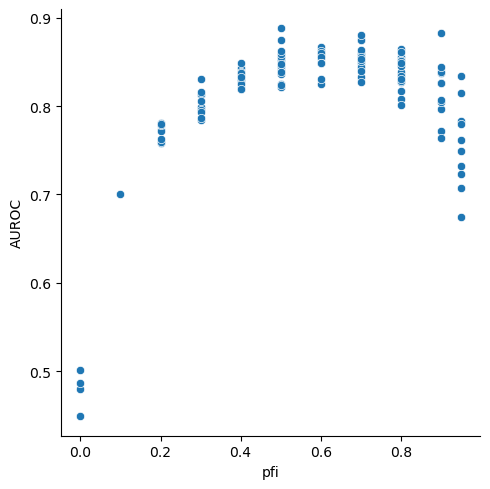

In [49]:
plt.figure()
sns.relplot(
    data=df, kind="scatter",
    x="pfi", y="AUROC",
)

plt.savefig("../results/plots/scatter_auroc-pfi_EMB_ex04v4.2_DK_20220921.png", facecolor="white", transparent=False)

<Figure size 640x480 with 0 Axes>

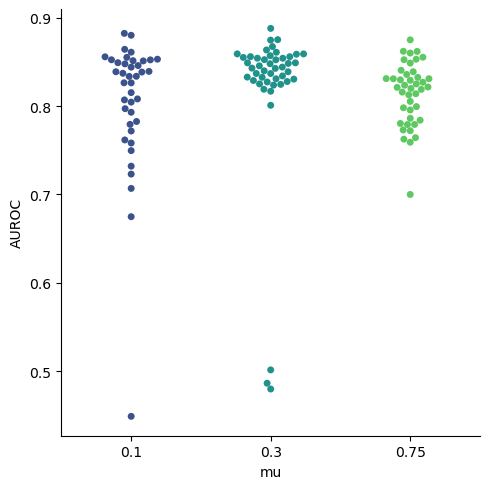

<Figure size 640x480 with 0 Axes>

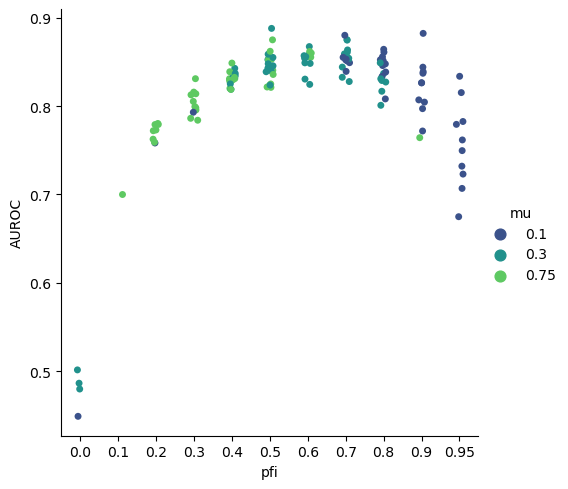

In [48]:
plt.figure()
sns.catplot(
    data=df, kind="swarm",
    x="mu", y="AUROC",
    palette="viridis"
)

plt.figure()
sns.catplot(
    data=df, kind="strip",
    x="pfi", y="AUROC",
    hue="mu", palette="viridis"
)